<a href="https://colab.research.google.com/github/yohana143/INT248/blob/main/Hand_Written_digits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
#from tensorflow import keras
import keras
from keras import utils as np_utils
from keras.utils import np_utils
#from keras_visualizer import visualizer
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
#from keras.optimizers import SGD
from keras import backend as k
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Importing the necessary libraries 

#Data Splitting

In [31]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [33]:
import matplotlib.pyplot as plt

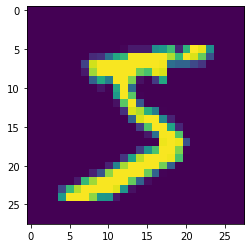

In [34]:
plt.imshow(x_train[0])

#Data Preprocessing

In [35]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [12]:
x_train.shape

(60000, 28, 28, 1)

#Since CNN accepts only binary values,we convert each class vector to binary class matrices

In [26]:
print("The y_train data is:\n\n",y_train)
print("\n")
#print("The x_test data is:\n\n",x_test)

The y_train data is:

 [5 0 4 ... 5 6 8]




In [15]:
x_train =x_train.astype("float32")
x_test=x_test.astype("float32")

#Normalize the data

In [16]:
x_train=x_train/255
x_test=x_test/255

In [37]:
x_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [18]:
#Total training samples
x_train.shape[0]

60000

#One Hot Encoder

In [40]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [41]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [42]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [45]:
total_classes=y_train.shape[1]
total_pixels=x_train.shape[1]*x_train.shape[2]

print(total_classes)
print(total_pixels)

10
784


In [19]:
#Total testing samples
x_test.shape[0]

10000

#Building the model

In [104]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(total_classes,activation='softmax',))

model.compile(
    loss='categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               1179776   
                                                      

#Training the model

In [142]:
trained_model=model.fit(x_train,
                        y_train,
                        batch_size=128,
                        epochs=8,
                        verbose=1,
                        validation_data=(x_test,y_test))

model.save('mnist.h5')

Epoch 1/8
469/469 [==============================] - 7s 16ms/step - loss: 0.0560 - accuracy: 0.9810 - val_loss: 0.0348 - val_accuracy: 0.9895
Epoch 2/8
469/469 [==============================] - 7s 16ms/step - loss: 0.0560 - accuracy: 0.9813 - val_loss: 0.0391 - val_accuracy: 0.9900
Epoch 3/8
469/469 [==============================] - 7s 15ms/step - loss: 0.0537 - accuracy: 0.9818 - val_loss: 0.0329 - val_accuracy: 0.9901
Epoch 4/8
469/469 [==============================] - 7s 16ms/step - loss: 0.0551 - accuracy: 0.9814 - val_loss: 0.0315 - val_accuracy: 0.9911
Epoch 5/8
469/469 [==============================] - 7s 15ms/step - loss: 0.0525 - accuracy: 0.9827 - val_loss: 0.0352 - val_accuracy: 0.9895
Epoch 6/8
469/469 [==============================] - 7s 15ms/step - loss: 0.0532 - accuracy: 0.9822 - val_loss: 0.0348 - val_accuracy: 0.9894
Epoch 7/8
469/469 [==============================] - 7s 15ms/step - loss: 0.0515 - accuracy: 0.9819 - val_loss: 0.0307 - val_accuracy: 0.9913
Epoch 

In [138]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
print(predictions)

[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [143]:
loaded_model=load_model("mnist.h5")

#Model Evaluation

In [144]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0348 - accuracy: 0.9905


[0.03477010875940323, 0.9904999732971191]

In [162]:
x_test=x_test[0]/255
x_test[0]

array([0.], dtype=float32)

#Prediction

In [157]:
y_predicted=model.predict(x_test)

In [164]:
y_predicted_labels=[np.argmax(i) for i in y_predicted] #for each i value we want to find np.argmax
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [165]:
y_predicted[2]

array([1.1597200e-14, 1.0000000e+00, 6.4310024e-10, 3.9501104e-14,
       3.3265842e-08, 1.3207576e-12, 9.5915541e-12, 1.6068615e-12,
       1.7880326e-11, 4.9810633e-13], dtype=float32)

In [166]:
np.argmax(y_predicted[2])

1